In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans

In [170]:
df = pd.read_csv('https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt')
df.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [171]:
df = df.drop(['Unnamed: 0'],axis=1)
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 645 entries, 0 to 644
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 35.4 KB


In [43]:
df.isnull().any()

Sqft           False
Floor          False
TotalFloor     False
Bedroom        False
Living.Room    False
Bathroom       False
Price          False
dtype: bool

In [44]:
df.describe()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
count,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000,645.000000
mean,1527.656260,5.939535,10.855814,2.837209,1.813953,1.810853,61986.823256
std,767.386531,3.884721,4.996208,1.010740,0.462364,0.683574,35635.091007
min,359.358000,1.000000,1.000000,1.000000,0.000000,0.000000,6100.000000
25%,925.080000,3.000000,7.000000,2.000000,2.000000,1.000000,39000.000000
50%,1423.200000,5.000000,12.000000,3.000000,2.000000,2.000000,50000.000000
75%,1892.856000,8.000000,14.000000,4.000000,2.000000,2.000000,75000.000000
max,5856.468000,22.000000,38.000000,7.000000,4.000000,5.000000,250000.000000


In [150]:
scaler=StandardScaler()
dfsc=scaler.fit_transform(df)


In [173]:
dfsc=pd.DataFrame(dfsc)
dfsc

,0,1,2,3,4,5,6,7
0,-1.731929,-0.456393,-1.014897,-0.772347,-0.828956,0.402694,0.276918,0.000370
1,-1.726586,0.791798,-0.242042,-0.772347,1.151328,0.402694,0.276918,0.449714
2,-1.721243,-0.507434,-0.242042,-0.772347,-0.828956,0.402694,-1.187117,-0.111966
3,-1.715900,-0.089824,-1.014897,-0.772347,0.161186,0.402694,0.276918,-0.477058
4,-1.710557,-0.730160,1.303669,0.629803,0.161186,0.402694,0.276918,-0.477058
...,...,...,...,...,...,...,...,...
640,1.703508,-0.219747,0.273195,0.830110,0.161186,0.402694,0.276918,-0.477058
641,1.708851,-1.500419,-0.499660,-0.171426,-1.819099,-1.761785,-1.187117,-1.044355
642,1.714194,-1.027127,1.818907,0.629803,-1.819099,-1.761785,-1.187117,-0.477058
643,1.719537,0.234984,-0.757279,0.629803,0.161186,0.402694,0.276918,0.084622


In [177]:
pca = PCA(n_components=2)
dfsc2d=pca.fit_transform(dfsc)

In [178]:
dfsc2d

array([[-0.52570679, -0.98950639],
       [ 1.20899751, -0.91734582],
       [-1.16762175, -0.2812818 ],
       ...,
       [-2.30727452,  2.54218616],
       [ 0.43885335, -0.39354563],
       [-0.98068338, -0.65050984]])

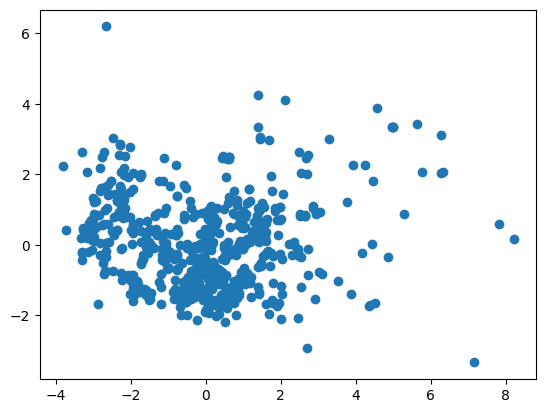

In [179]:
plt.scatter(dfsc2d[:,0],dfsc2d[:,1])

In [209]:
elbow=[]
r=range(1,11)
for k in r:
  km=KMeans(n_clusters=k)
  km.fit(df)
  elbow.append(km.inertia_)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

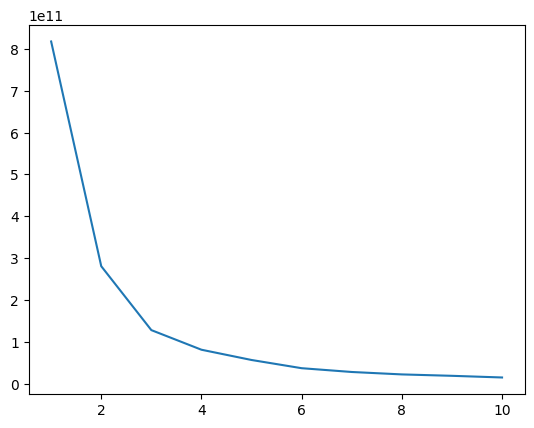

In [210]:
plt.plot(r,elbow)

In [191]:
km=KMeans(n_clusters=3)
km.fit(dfsc)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [192]:
df['cluster']=km.labels_
df.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price,cluster
0,1177.698,2,7,2,2,2,62000,1
1,2134.800,5,7,4,2,2,78000,1
2,1138.560,5,7,2,2,1,58000,2
3,1458.780,2,7,3,2,2,45000,1
4,967.776,11,14,3,2,2,45000,1


In [193]:
df2d=pd.DataFrame(dfsc2d,columns=['pc1','pc2'])
df2d['cluster']=km.labels_
df2d.head()

,pc1,pc2,cluster
0,-0.525707,-0.989506,1
1,1.208998,-0.917346,1
2,-1.167622,-0.281282,2
3,-0.152661,-1.288856,1
4,0.133093,1.097757,1


In [194]:
df2d0=df2d[df2d['cluster']==0]
df2d1=df2d[df2d['cluster']==1]
df2d2=df2d[df2d['cluster']==2]


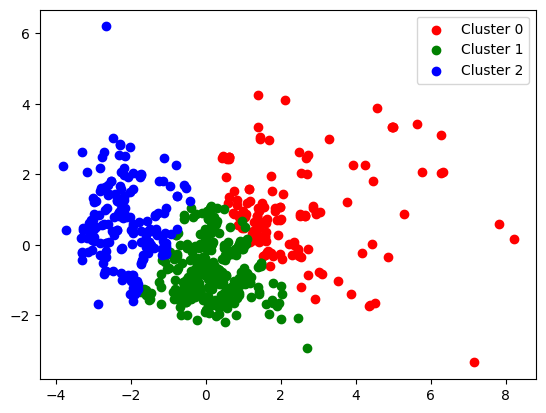

In [198]:
plt.scatter(df2d0['pc1'],df2d0['pc2'],color='red', label=f'Cluster 0')
plt.scatter(df2d1['pc1'],df2d1['pc2'],color='green', label=f'Cluster 1')
plt.scatter(df2d2['pc1'],df2d2['pc2'],color='blue', label=f'Cluster 2')

plt.legend()
plt.show()
